<a href="https://colab.research.google.com/github/ryandraper/neural-network-learning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regresssion problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import a TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data to view and fit


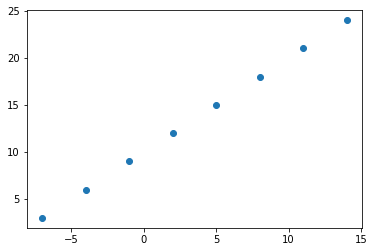

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y ==X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape


(TensorShape([]), TensorShape([]))

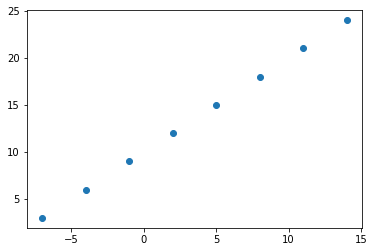

In [13]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (the function that tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evalutaion metris (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X&y (features and labels)

In [14]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using hte Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# model.add(tf.keras.layers.Dense(1)) # other way of adding layer

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent)
              metrics=["mae"]
              )

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

#

Epoch 1/5
1/1 [==============================] - 1s 596ms/step - loss: 11.1263 - mae: 11.1263
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 10.9938 - mae: 10.9938
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 10.8613 - mae: 10.8613
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 10.7288 - mae: 10.7288
Epoch 5/5
1/1 [==============================] - 0s 20ms/step - loss: 10.5963 - mae: 10.5963


In [15]:
# Check out x and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model
y_pred = model.predict([-4])
y_pred

1/1 [==============================] - 0s 134ms/step


array([[-3.362823]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create our model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activiation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the  **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [17]:
# Let's rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 633ms/step - loss: 10.5798 - mae: 10.5798
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4473 - mae: 10.4473
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3148 - mae: 10.3148
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1823 - mae: 10.1823
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0498 - mae: 10.0498
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9173 - mae: 9.9173
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 9.7848 - mae: 9.7848
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 9.6523 - mae: 9.6523
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 9.5198 - mae: 9.5198
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 9.3873 - mae: 9.3873
Epoch 11/100
1/1 [==============================] - 0s 14m

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 89ms/step


array([[29.871492]], dtype=float32)

In [20]:
# Let's rebuild our model

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
])

#2. Compile the model
model.compile(loss="mae", # other way of specifying loss function
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 464ms/step - loss: 14.2795 - mae: 14.2795
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.8096 - mae: 13.8096
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 13.3426 - mae: 13.3426
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8762 - mae: 12.8762
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4077 - mae: 12.4077
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 11.9349 - mae: 11.9349
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4553 - mae: 11.4553
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9665 - mae: 10.9665
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 10.4658 - mae: 10.4658
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9508 - mae: 9.9508
Epoch 11/100
1/1 [==============================] 

changing to Adam and changing the learning rate actually gave me a worse result from the videos, but I'm using a newer version of tensorflow

In [21]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 112ms/step


array([[29.882504]], dtype=float32)

Looks like even though the loss and mae is better with this model but the result isn't actually better. This may be 'overfitting'

## Evaluating a model

In practice, a typical workflow you'll go through when building a neural network is:
`Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it`

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

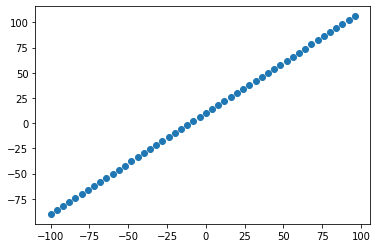

In [25]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [26]:
# Check the length of how many samples we have
len(X)

50

In [27]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samplse (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets...let's visualize it again!


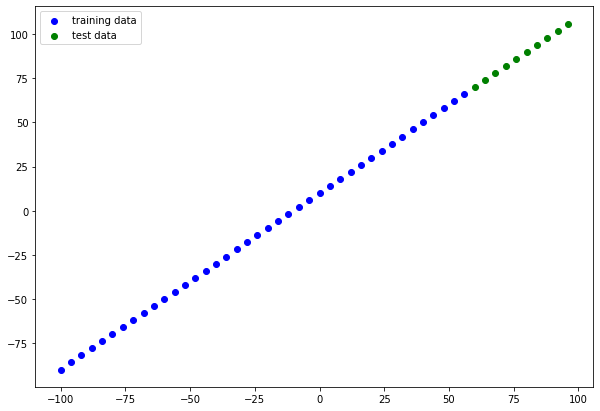

In [28]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="test data")
plt.legend()

In [29]:
# Let's have a look at how to build a neural network for our data

#1. Create the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss="mae", 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (this time we'll train for longer)
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [30]:
### Visualizing the model
# model.summary()

In [31]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer", activation=None),
    tf.keras.layers.Dense(1, name="output_layer")
], name="test")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains. 
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

📖 **Resource**: For a more in depth overview of trainable parameters within a layer, check out MITs introduction to deep learning http://introtodeeplearning.com/

🛠 **Exercise**: play around with the model definition and look at the summary output

In [32]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [33]:
# get a summary of our model
model.summary()

Model: "test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


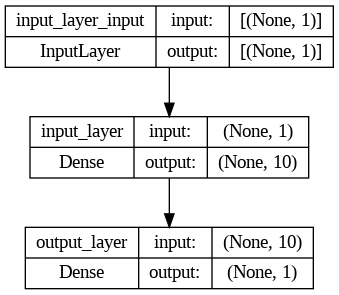

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True) 

### Visualizing our model's predictions

To visualize predictinos, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model)

In [35]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 68ms/step


array([[ 91.2984  ],
       [ 97.25995 ],
       [103.22153 ],
       [109.18308 ],
       [115.144646],
       [121.10621 ],
       [127.067764],
       [133.02933 ],
       [138.99088 ],
       [144.95245 ]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 Note: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to 

In [37]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b",label="Training data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #Show the legend
  plt.legend();

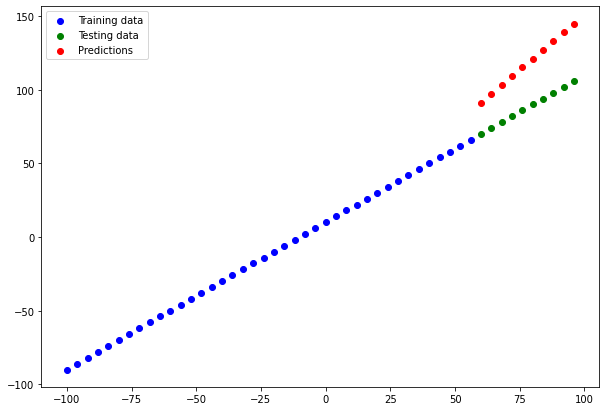

In [38]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)


### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error - "square the mean error"

In [39]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 192ms/step - loss: 30.1254 - mae: 30.1254


[30.12542152404785, 30.12542152404785]

In [40]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 91.2984  ],
       [ 97.25995 ],
       [103.22153 ],
       [109.18308 ],
       [115.144646],
       [121.10621 ],
       [127.067764],
       [133.02933 ],
       [138.99088 ],
       [144.95245 ]], dtype=float32)>

In [41]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 91.2984  ,  97.25995 , 103.22153 , 109.18308 , 115.144646,
       121.10621 , 127.067764, 133.02933 , 138.99088 , 144.95245 ],
      dtype=float32)>

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [43]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.25968 , 12.103979, 15.777222, 21.183083, 27.144648, 33.10621 ,
       39.067764, 45.029327, 50.990875, 56.952454], dtype=float32)>

In [44]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.125423>

In [45]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=939.28485>

In [46]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))


def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it ->....
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and lables).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build model_1**


In [47]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the plot_model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 39.9925 - mae: 39.9925
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6180 - mae: 11.6180
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 11.6273 - mae: 11.6273
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3815 - mae: 9.3815
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2611 - mae: 10.2611
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.5138 - mae: 9.5138
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6413 - mae: 8.6413
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0580 - mae: 9.0580
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.9138 - mae: 18.9138
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 10.2103 - mae: 10.2103
Epoch 11/100
2/2 [==============================] - 0s 8ms/step

1/1 [==============================] - 0s 72ms/step


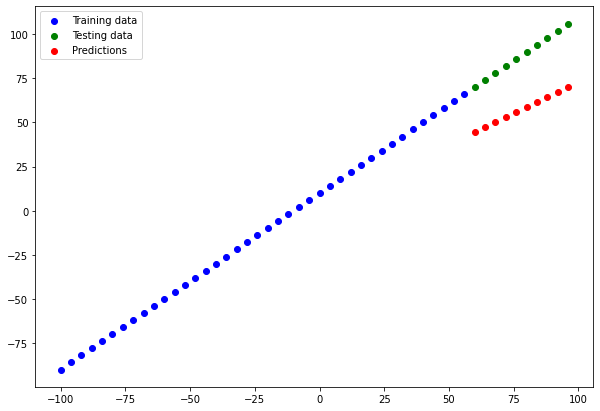

In [48]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [49]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.640097>,
 <tf.Tensor: shape=(), dtype=float32, numpy=949.2533>)

**Build model_2**

* 2 dense layers, trained for 100 epochs

In [50]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 59.0865 - mae: 59.0865
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 36.4257 - mae: 36.4257
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 39.3387 - mae: 39.3387
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 32.0510 - mae: 32.0510
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 16.6992 - mae: 16.6992
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 11.3398 - mae: 11.3398
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.4047 - mae: 12.4047
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0186 - mae: 11.0186
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 39.1536 - mae: 39.1536
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 26.7173 - mae: 26.7173
Epoch 11/100
2/2 [==============================] - 0s 8

1/1 [==============================] - 0s 66ms/step


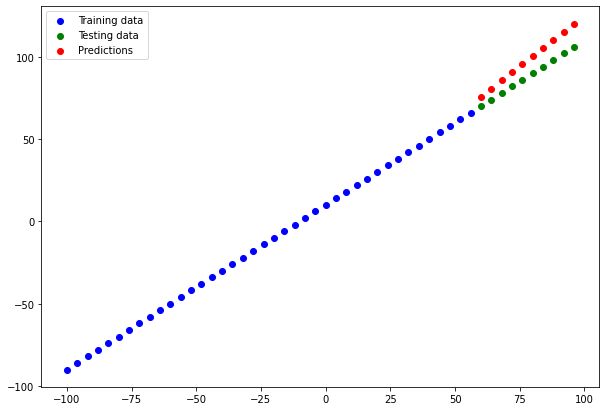

In [51]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [52]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=9.963391>,
 <tf.Tensor: shape=(), dtype=float32, numpy=106.48625>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [53]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 23ms/step - loss: 53.1200 - mae: 53.1200
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 11.6391 - mae: 11.6391
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 30.8422 - mae: 30.8422
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 14.4401 - mae: 14.4401
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 20.3413 - mae: 20.3413
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 8.1765 - mae: 8.1765
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 17.1507 - mae: 17.1507
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 17.1454 - mae: 17.1454
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 30.1053 - mae: 30.1053
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 12.0749 - mae: 12.0749
Epoch 11/500
2/2 [==============================] - 0s 1

1/1 [==============================] - 0s 61ms/step


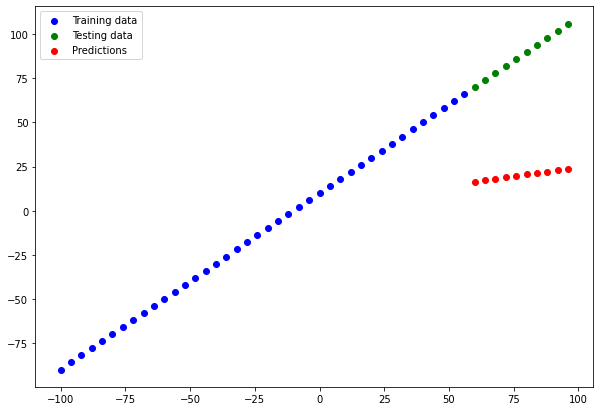

In [54]:
# Make and plot predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [55]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.90025>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4695.0454>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results

In [56]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.640097,949.253296
1,model_2,9.963391,106.486252
2,model_3,67.900253,4695.045410


Looke like `model_2` performed the best

In [57]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work; and in turn, get close to figuing out what does work. Remember the machine learning practitioner's motto "experiment, experiment, experiment"

### Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 Resource: As you build more models, you'll want to look into using:

* TensorBoard - a component of TensorFlow library to help track modelling experiments (we'll see this one later)
* Weights & Biases - wandb.com a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web app or a mobile app.

There are two main formats we can save our model's to:

1. The SavedModel format
2. The HDF5 format

In [58]:
# Save model to the SavedModel format
model_2.save("best_model_SavedModel_format")

In [59]:
# Save model to the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in  a saved model



In [60]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 50ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [65]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 61ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [64]:
# Compare the mae of model_2_preds and SavedModel preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. Right click and download from Colab
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (See 2nd code cell below).

In [67]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/DEV\ SHOW

In [71]:
!ls /content/drive/MyDrive/DEV\ SHOW

'Apex Exception Handling.gslides'   best_model_HDF5_format.h5


## A larger example

In [72]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt



In [73]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [79]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [81]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
 #View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [82]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [83]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [96]:
# Build a neural network (sort of like the model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8700.7715 - mae: 8700.7715
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7876.3364 - mae: 7876.3364
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7556.7935 - mae: 7556.7935
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7765.2559 - mae: 7765.2559
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7693.7783 - mae: 7693.7783
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7541.6250 - mae: 7541.6250
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7528.7339 - mae: 7528.7339
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7762.9458 - mae: 7762.9458
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7494.7822 - mae: 7494.7822
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7562.7144 - mae: 7562.7144

In [97]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8851.7646 - mae: 8851.7646


[8851.7646484375, 8851.7646484375]

In [98]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well...let's try and improve it

To (try) to improve our model, we'll run 2 experiments:
1. add an extra layer with more hidden units
2. Train for longer
3. (insert you own experiment here)

In [100]:
# Build a neural network (sort of like the model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model - had to use Adam() as SGD() was giving us: loss: nan - mae: nan 
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13287.9463 - mae: 13287.9463
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13086.9473 - mae: 13086.9473
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12674.9160 - mae: 12674.9160
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11890.5107 - mae: 11890.5107
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10645.5322 - mae: 10645.5322
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9169.8662 - mae: 9169.8662
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7953.7749 - mae: 7953.7749
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7492.2988 - mae: 7492.2988
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.7920 - mae: 7429.7920
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7410.1357 - mae:

In [95]:
# evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4790.5093 - mae: 4790.5093


[4790.50927734375, 4790.50927734375]

In [101]:
# Build a neural network (sort of like the model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model - had to use Adam() as SGD() was giving us: loss: nan - mae: nan 
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 2s 8ms/step - loss: 13288.9941 - mae: 13288.9941
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13098.5420 - mae: 13098.5420
Epoch 3/200
34/34 [==============================] - 0s 8ms/step - loss: 12709.5625 - mae: 12709.5625
Epoch 4/200
34/34 [==============================] - 0s 11ms/step - loss: 11954.6289 - mae: 11954.6289
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 10729.4189 - mae: 10729.4189
Epoch 6/200
34/34 [==============================] - 0s 7ms/step - loss: 9244.1514 - mae: 9244.1514
Epoch 7/200
34/34 [==============================] - 0s 7ms/step - loss: 7980.4609 - mae: 7980.4609
Epoch 8/200
34/34 [==============================] - 0s 7ms/step - loss: 7485.3071 - mae: 7485.3071
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 7418.6582 - mae: 7418.6582
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7399.4297 - mae

In [102]:
# evaluate the larger model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.6794 - mae: 3488.6794


[3488.679443359375, 3488.679443359375]

Text(0.5, 0, 'epochs')

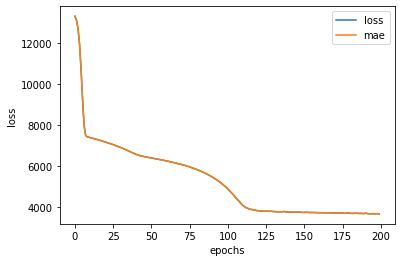

In [103]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long should you train for?

It depends. Really... It depends on the problem you're working on. However, many people have asked this question before... so TensorFlow  has a solution! It's called the early stopping callback, which is a TF component you can add to your model to stop training once it stops improving a certain metric

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try to use both.

In [104]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<AxesSubplot:ylabel='Frequency'>

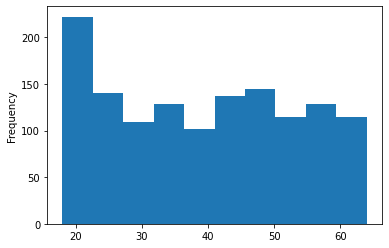

In [106]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

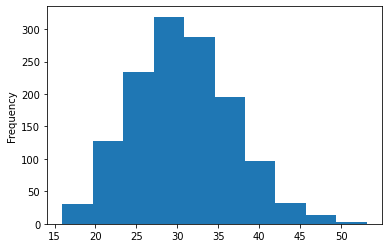

In [107]:
X["bmi"].plot(kind="hist")

In [108]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from SciKit-Learn

In [110]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#  Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [111]:
# What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [114]:
X_train_normal[0]


array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [115]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [116]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100 )

Epoch 1/100
34/34 [==============================] - 3s 5ms/step - loss: 13344.3682 - mae: 13344.3682
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13337.3184 - mae: 13337.3184
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13319.0977 - mae: 13319.0977
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 13278.9463 - mae: 13278.9463
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 13205.4844 - mae: 13205.4844
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 13087.7861 - mae: 13087.7861
Epoch 7/100
34/34 [==============================] - 0s 9ms/step - loss: 12915.4199 - mae: 12915.4199
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 12678.1035 - mae: 12678.1035
Epoch 9/100
34/34 [==============================] - 0s 9ms/step - loss: 12365.5508 - mae: 12365.5508
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 11972.36

In [117]:
# evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3440.7212 - mae: 3440.7209


[3440.72119140625, 3440.720947265625]

In [ ]:
# reminder: model 2 evaluation
# 9/9 [==============================] - 0s 2ms/step - loss: 4790.5093 - mae: 4790.5093


One hot encoding and normalization improved our mae by about 30%